# Future Weather Forcasting

## Installing Requred Libraries And Packages

In [1]:
# !pip install -U scikit-learn
# !python -m pip install --upgrade pip
# !pip install matplotlib
# !python -m pip install seaborn
# !pip install openpyxl
# !python -m pip install prophet
# !pip install --upgrade plotly
# !pip install plotly==5.10.0

## Importing Requred Libraries And Packages

In [2]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
import warnings
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set_theme()

## Importing Dataset

In [3]:
df = pd.read_excel('weather data.xlsx')

In [4]:
df.head()

Year  Month  Day  Temperature Max  Temperature Min  Precipitation  \
0  1981      1    1            24.68            12.73            0.0   
1  1981      1    2            24.05            14.08            0.0   
2  1981      1    3            23.69            13.35            0.0   
3  1981      1    4            24.32            13.90            0.0   
4  1981      1    5            24.44            14.44            0.0   

   Humidity  Wind Speed Max  Wind Speed Min  Wind Speed Range  Wind Direction  
0      8.48            5.12            2.68              2.45          179.69  
1      7.81            3.63            1.89              1.75          187.94  
2      7.81            3.38            0.77              2.61          184.81  
3      7.81            3.23            0.44              2.80          193.38  
4      9.52            3.53            1.01              2.53          187.00

In [5]:
df.isnull().any()

Year                False
Month               False
Day                 False
Temperature Max     False
Temperature Min     False
Precipitation       False
Humidity            False
Wind Speed Max      False
Wind Speed Min      False
Wind Speed Range    False
Wind Direction      False
dtype: bool

In [6]:
# cols = df.columns.difference(['Temperature Max', 'Temperature Min', 'Precipitation', 'Humidity', 'Wind Speed Max', 'Wind Speed Min', 'Wind Speed Range', 'Wind DIrection'])
# df['Date'] = df[cols].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)), 1)
# df = df.drop(cols, axis=1)

## Preprocessing Dataset

In [7]:
df['Date'] = df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
df = df.drop(df[['Year', 'Month', 'Day']], axis=1)
df

Temperature Max  Temperature Min  Precipitation  Humidity  \
0                24.68            12.73            0.0      8.48   
1                24.05            14.08            0.0      7.81   
2                23.69            13.35            0.0      7.81   
3                24.32            13.90            0.0      7.81   
4                24.44            14.44            0.0      9.52   
...                ...              ...            ...       ...   
14970            24.18            13.95            0.0      9.95   
14971            24.11            13.77            0.0      9.70   
14972            24.04            13.95            0.0      9.34   
14973            26.97            15.18            0.0      9.16   
14974            24.60            13.95            0.0     10.50   

       Wind Speed Max  Wind Speed Min  Wind Speed Range  Wind Direction  \
0                5.12            2.68              2.45          179.69   
1                3.63            1.89              1.75          187.94   
2                3.38            0.77              2.61          184.81   
3                3.23            0.44              2.80          193.38   
4                3.53            1.01              2.53          187.00   
...               ...             ...               ...             ...   
14970            4.73            0.77              3.95          141.75   
14971            4.21            1.82              2.38           77.81   
14972            3.66            1.04              2.62          155.25   
14973            4.85            0.27              4.59          148.12   
14974            5.15            3.20              1.95          136.88   

             Date  
0        1981-1-1  
1        1981-1-2  
2        1981-1-3  
3        1981-1-4  
4        1981-1-5  
...           ...  
14970  2021-12-27  
14971  2021-12-28  
14972  2021-12-29  
14973  2021-12-30  
14974  2021-12-31  

[14975 rows x 9 columns]

## Dataset Visualization

### Data Frequency


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf984436d0>,
      dtype=object)

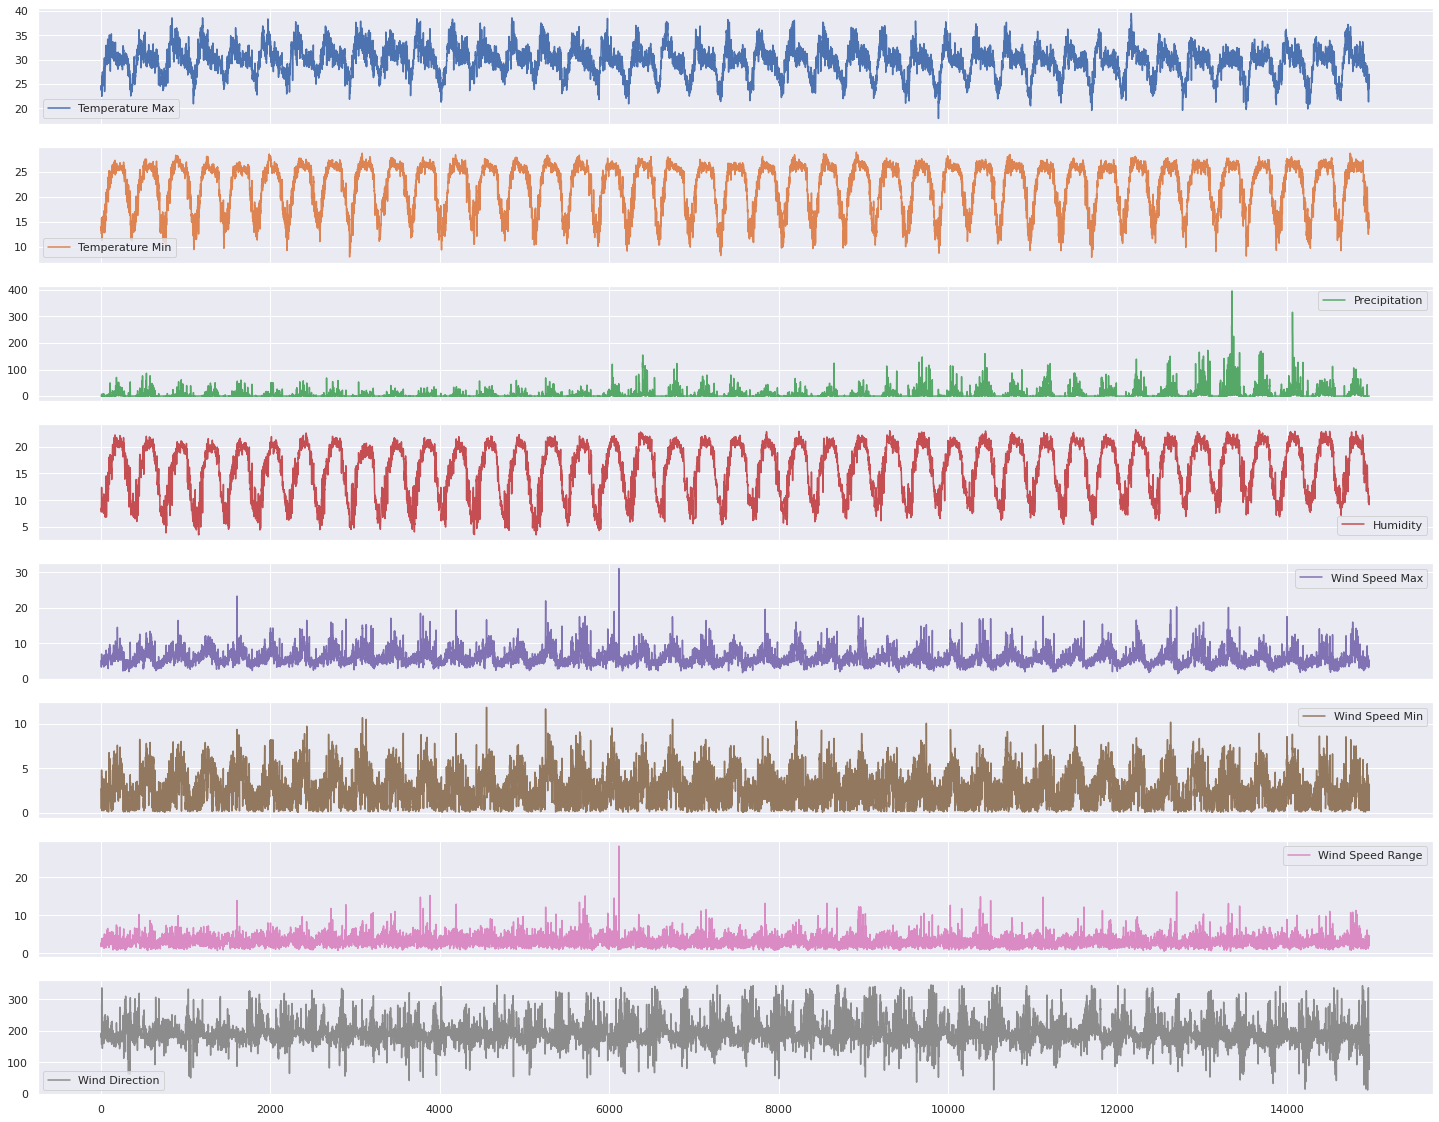

In [8]:
df.plot(subplots=True, figsize=(25,20))

### Data Heatmap


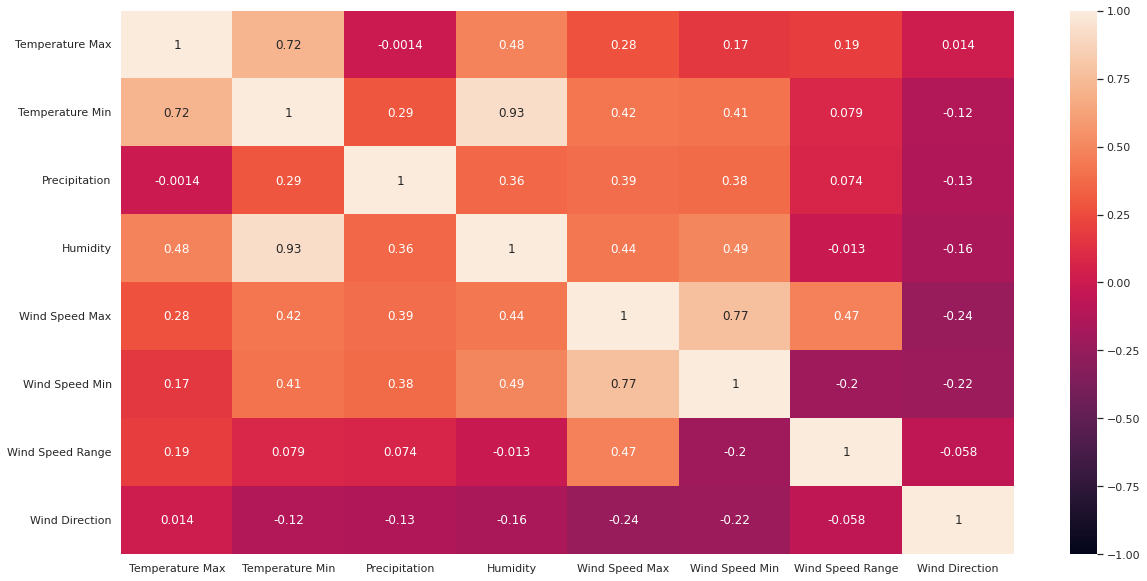

In [9]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### alternative

In [10]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Max'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

In [11]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Min'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

### Histogram 1

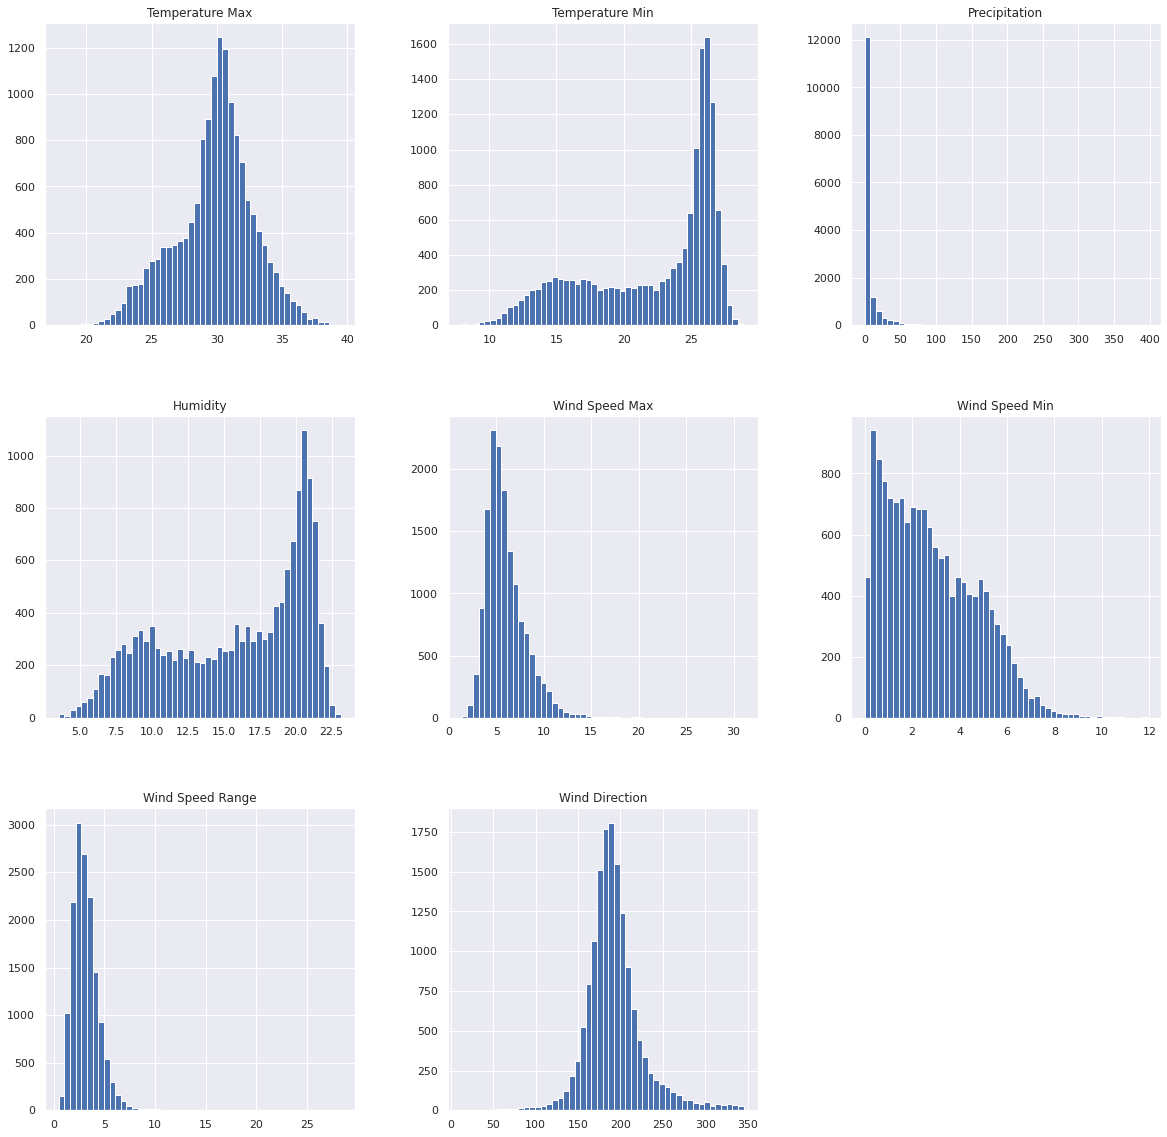

In [12]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

### Histogram 2

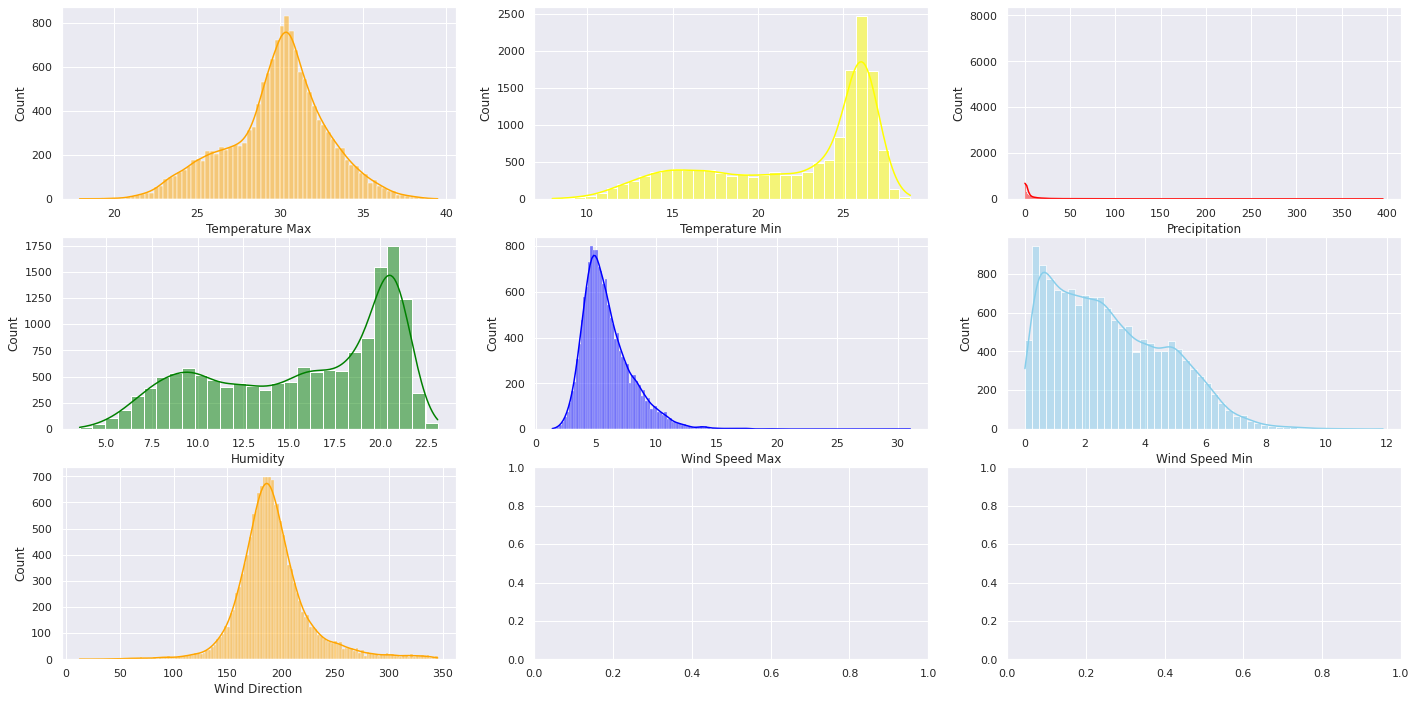

In [13]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(3,3,figsize=(24,12))
sns.histplot(data=df,x="Temperature Max",kde=True,ax=axs[0,0],color='orange')
sns.histplot(data=df,x="Temperature Min",kde=True,ax=axs[0,1],color='yellow')
sns.histplot(data=df,x="Precipitation",kde=True,ax=axs[0,2],color='red')
sns.histplot(data=df,x="Humidity",kde=True,ax=axs[1,0],color='green')
sns.histplot(data=df,x="Wind Speed Max",kde=True,ax=axs[1,1],color='blue')
sns.histplot(data=df,x="Wind Speed Min",kde=True,ax=axs[1,2],color='skyblue')
sns.histplot(data=df,x="Wind Direction",kde=True,ax=axs[2,0],color='orange')

## **Model**

### Evaluations

> *Evaluations of Parameters such as (**Temperature Max, Temperature Min, Precipitation, Humidity, Wind Speed Max, Wind Speed Min, Wind DIrection**)*

> How many days would you want to predict?

In [14]:
days = int(10227)
predicted_data = pd.DataFrame()  

#### 1 **Humidity**

> 1.1 Model Creation

In [15]:
model1 = Prophet()

> 1.2 Data preprocessing

In [16]:
df_for_humidity=df[['Date','Humidity']]
df_for_humidity['Date']=pd.to_datetime(df_for_humidity['Date'])
df_for_humidity.rename(columns = {'Date':'ds'}, inplace = True)
df_for_humidity.rename(columns = {'Humidity':'y'}, inplace = True)
model1.fit(df_for_humidity)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/3969nkmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/xojwb2g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22729', 'data', 'file=/tmp/tmpu5h4dkxl/3969nkmf.json', 'init=/tmp/tmpu5h4dkxl/xojwb2g6.json', 'output', 'file=/tmp/tmp33h96yel/prophet_model-20220905220913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 1.3 Generate future Dates

In [17]:
future = model1.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 1.4 predict future Humidity

In [18]:
forecast = model1.predict(future)
predicted_data['Date'] = forecast['ds']
predicted_data['Humidity'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  11.771848    5.266079   17.969523
25198 2049-12-28  11.707827    5.454310   18.061532
25199 2049-12-29  11.653720    5.379349   18.299588
25200 2049-12-30  11.576902    5.333164   17.877702
25201 2049-12-31  11.520604    5.305798   17.965556

> 1.5 Visusalization (past and future)

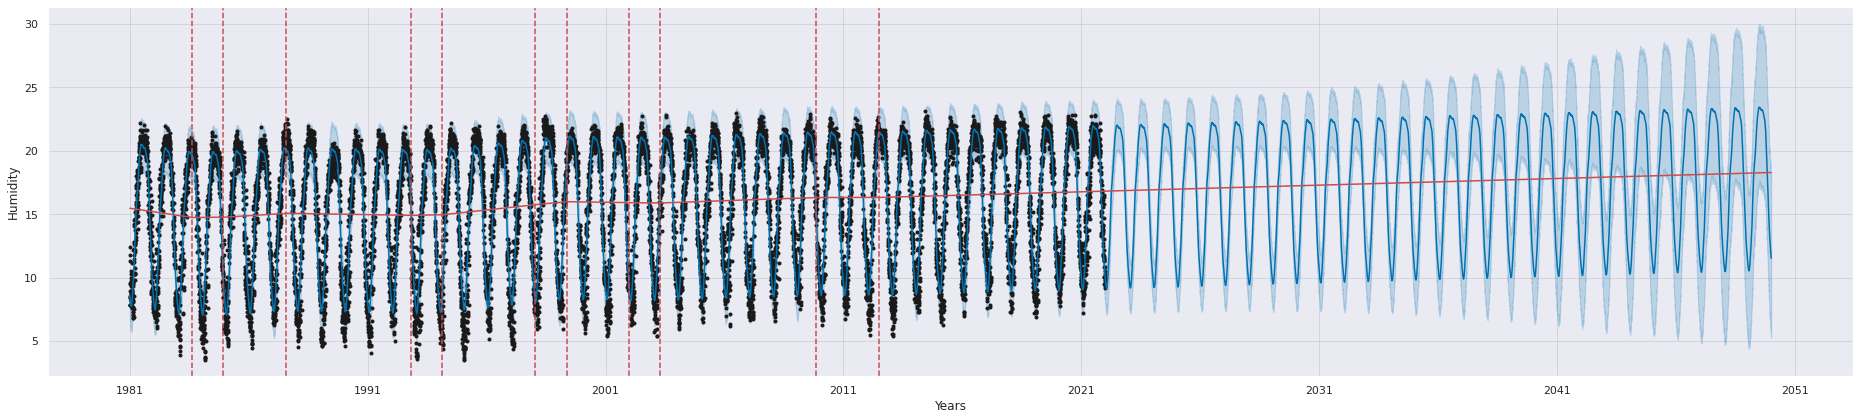

In [19]:
fig = model1.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model1, forecast)
plt.xlabel('Years')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

> 1.6 Visusalization of Trend, Yearly & Day

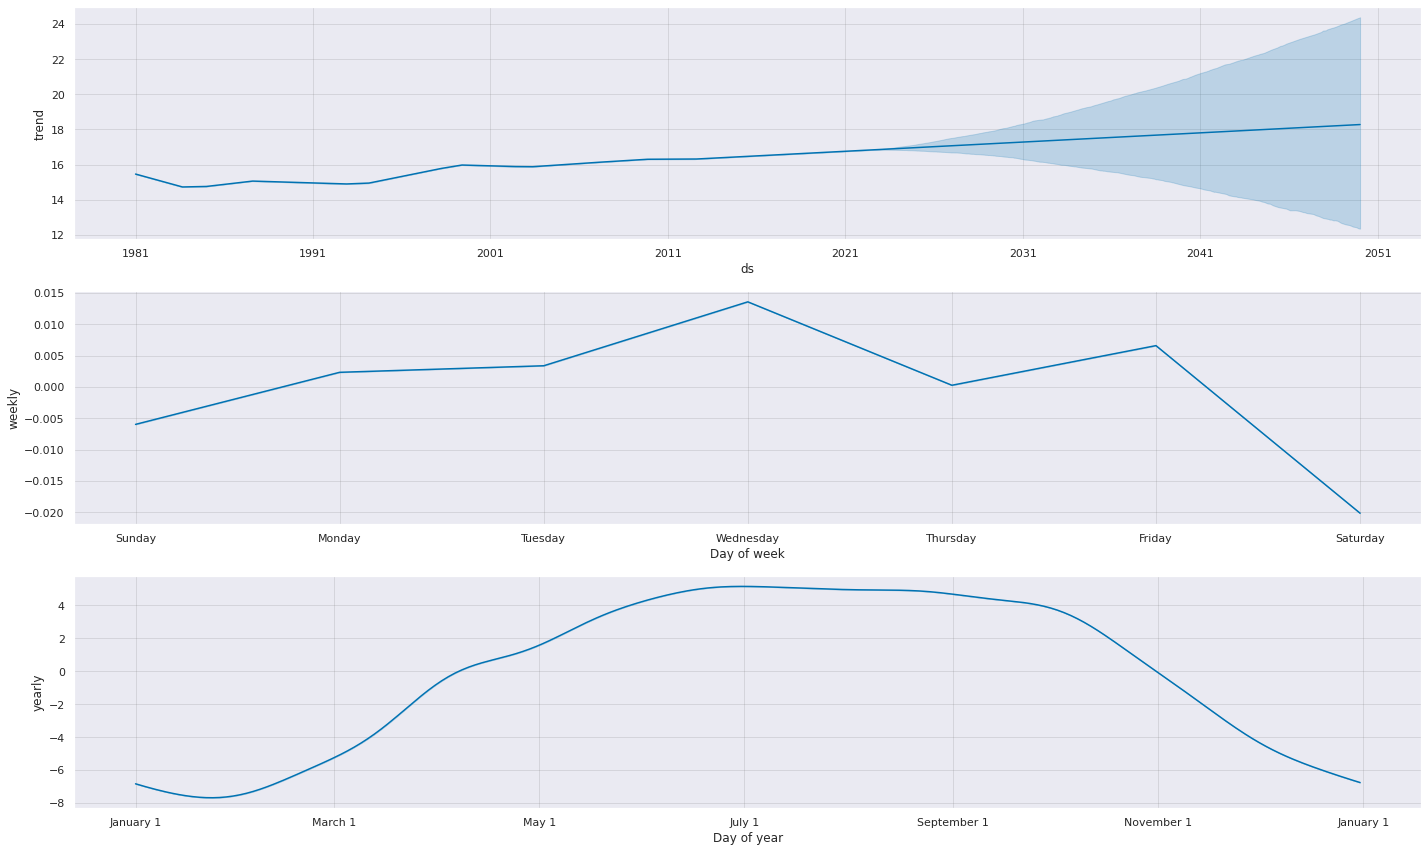

In [20]:
fig = model1.plot_components(forecast, figsize=(20, 12))

#### 2 **Max Temperature**

> 2.1 Model Creation

In [21]:
model2 = Prophet()

> 2.2 Data preprocessing

In [22]:
df_for_temp_max=df[['Date','Temperature Max']]
df_for_temp_max['Date']=pd.to_datetime(df_for_temp_max['Date'])
df_for_temp_max.rename(columns = {'Date':'ds'}, inplace = True)
df_for_temp_max.rename(columns = {'Temperature Max':'y'}, inplace = True)
model2.fit(df_for_temp_max)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/5ugpm2u6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/cq1mmhxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41898', 'data', 'file=/tmp/tmpu5h4dkxl/5ugpm2u6.json', 'init=/tmp/tmpu5h4dkxl/cq1mmhxw.json', 'output', 'file=/tmp/tmpr2lzretc/prophet_model-20220905220940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:09:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 2.3 Generate future Dates

In [23]:
# 2022 - 2050 : 10226 days
future = model2.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 2.4 predict future Humidity

In [24]:
forecast = model2.predict(future)
predicted_data['Max Temp'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  23.772298   13.686061   34.091398
25198 2049-12-28  23.711830   13.294701   33.981282
25199 2049-12-29  23.672680   13.665106   33.782173
25200 2049-12-30  23.673126   13.877676   33.788674
25201 2049-12-31  23.656620   13.458955   33.660652

> 2.5 Visusalization (past and future)

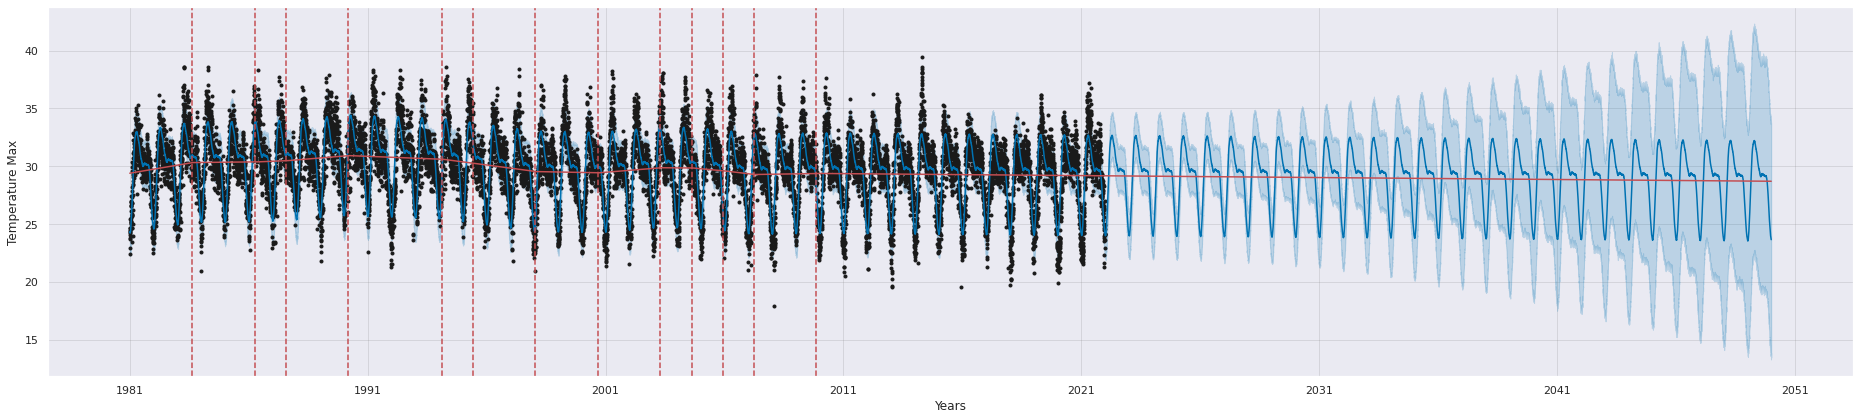

In [25]:
fig = model2.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model2, forecast)
plt.xlabel('Years')
plt.ylabel('Temperature Max')
plt.tight_layout()
plt.show()

> 2.6 Visusalization of Trend, Yearly & Day

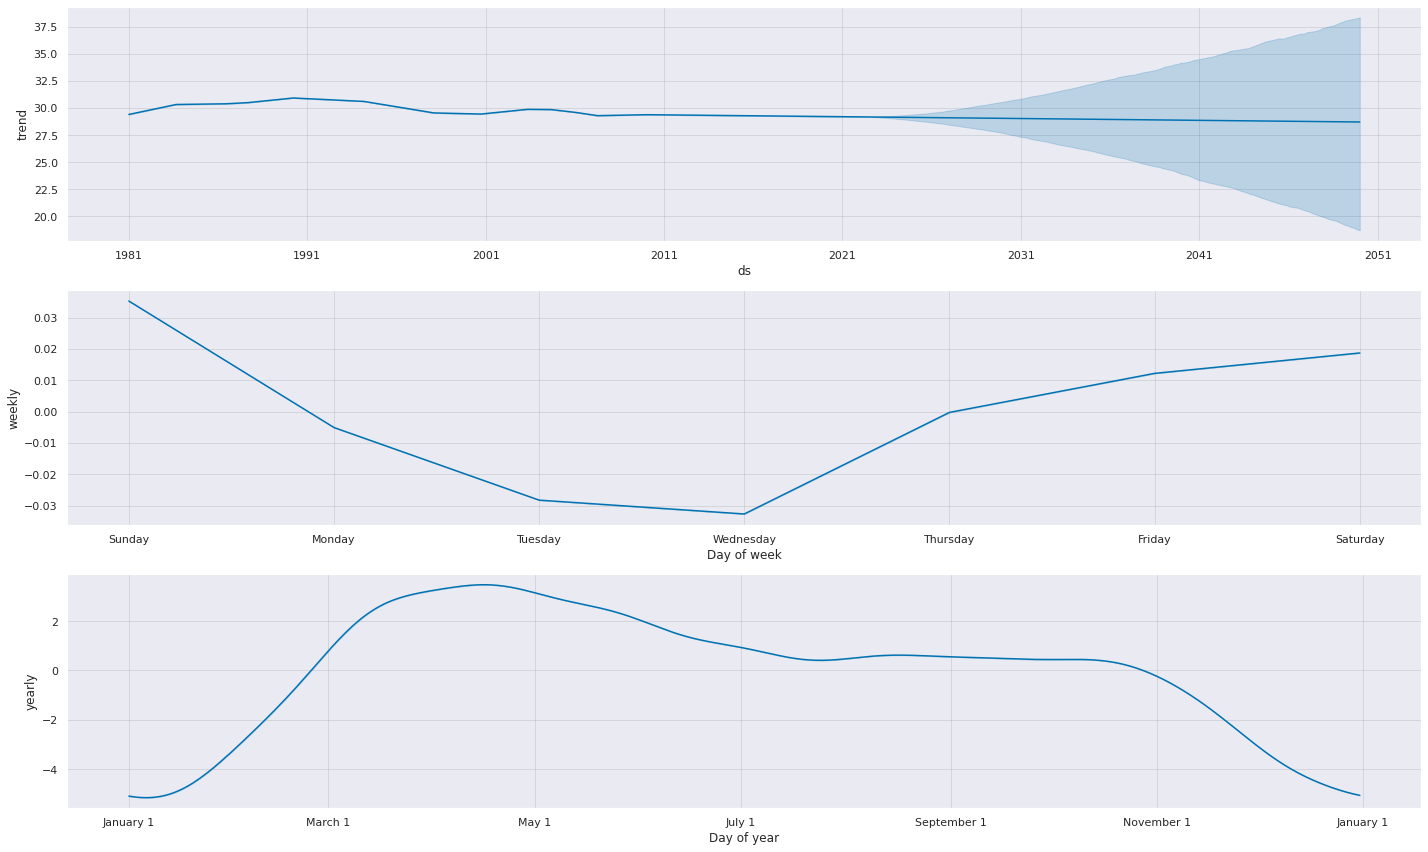

In [26]:
fig = model2.plot_components(forecast, figsize=(20, 12))

#### 3 **Min Temperature**

> 3.1 Model Creation

In [27]:
model3 = Prophet()

> 3.2 Data preprocessing

In [28]:
df_for_temp_min=df[['Date','Temperature Min']]
df_for_temp_min['Date']=pd.to_datetime(df_for_temp_min['Date'])
df_for_temp_min.rename(columns = {'Date':'ds'}, inplace = True)
df_for_temp_min.rename(columns = {'Temperature Min':'y'}, inplace = True)
model3.fit(df_for_temp_min)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/b4omwmx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/2i4hvsln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30787', 'data', 'file=/tmp/tmpu5h4dkxl/b4omwmx7.json', 'init=/tmp/tmpu5h4dkxl/2i4hvsln.json', 'output', 'file=/tmp/tmp448g2qqk/prophet_model-20220905221011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 3.3 Generate future Dates

In [29]:
# 2022 - 2050 : 10226 days
future = model3.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 3.4 predict future Humidity

In [30]:
forecast = model3.predict(future)
predicted_data['Min Temp'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  14.892160   11.661669   18.105258
25198 2049-12-28  14.814689   11.646797   17.938790
25199 2049-12-29  14.741969   11.394916   18.055296
25200 2049-12-30  14.643018   11.325792   17.693285
25201 2049-12-31  14.572607   11.340563   17.532302

> 3.5 Visusalization (past and future)

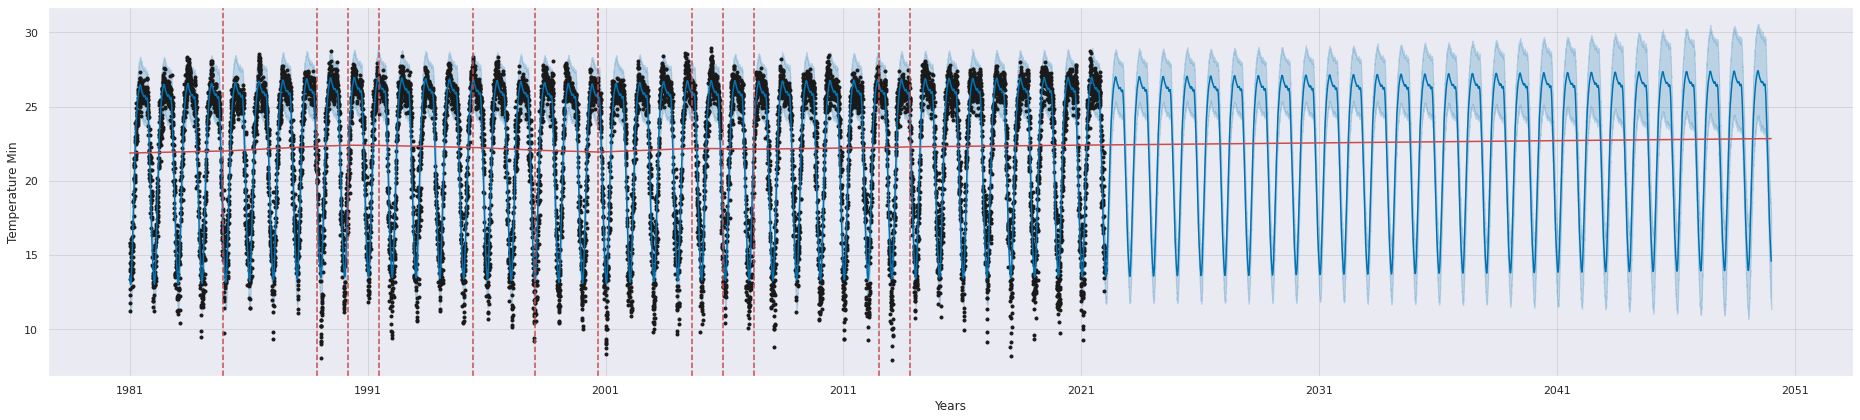

In [31]:
fig = model3.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model3, forecast)
plt.xlabel('Years')
plt.ylabel('Temperature Min')
plt.tight_layout()
plt.show()

> 3.6 Visusalization of Trend, Yearly & Day

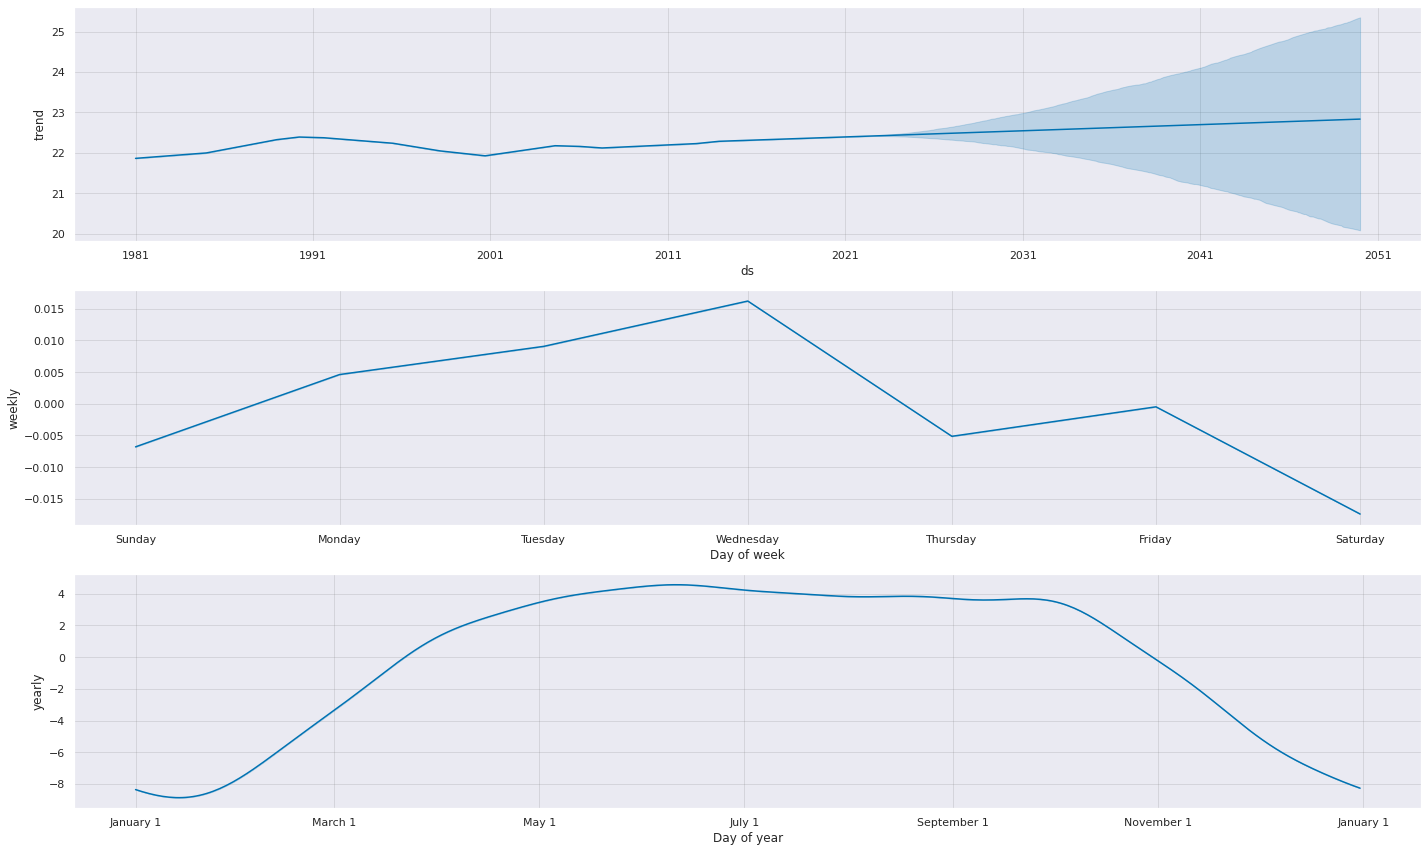

In [32]:
fig = model3.plot_components(forecast, figsize=(20, 12))

#### 4 **Precipitation**

> 4.1 Model Creation

In [33]:
model4 = Prophet()

> 4.2 Data preprocessing

In [34]:
df_for_rain=df[['Date','Precipitation']]
df_for_rain['Date']=pd.to_datetime(df_for_rain['Date'])
df_for_rain.rename(columns = {'Date':'ds'}, inplace = True)
df_for_rain.rename(columns = {'Precipitation':'y'}, inplace = True)
model4.fit(df_for_rain)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/3__knxxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/4rih78o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68838', 'data', 'file=/tmp/tmpu5h4dkxl/3__knxxb.json', 'init=/tmp/tmpu5h4dkxl/4rih78o6.json', 'output', 'file=/tmp/tmp395sp_bs/prophet_model-20220905221037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 4.3 Generate future Dates

In [35]:
# 2022 - 2050 : 10226 days
future = model4.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 4.4 predict future Humidity

In [36]:
forecast = model4.predict(future)
predicted_data['Precipitation'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  27.695674   -2.949973   56.685101
25198 2049-12-28  27.517596   -3.054406   56.764871
25199 2049-12-29  27.251245   -4.565143   56.176699
25200 2049-12-30  27.199003   -2.253727   56.180966
25201 2049-12-31  27.374831   -3.268106   56.244789

> 4.5 Visusalization (past and future)

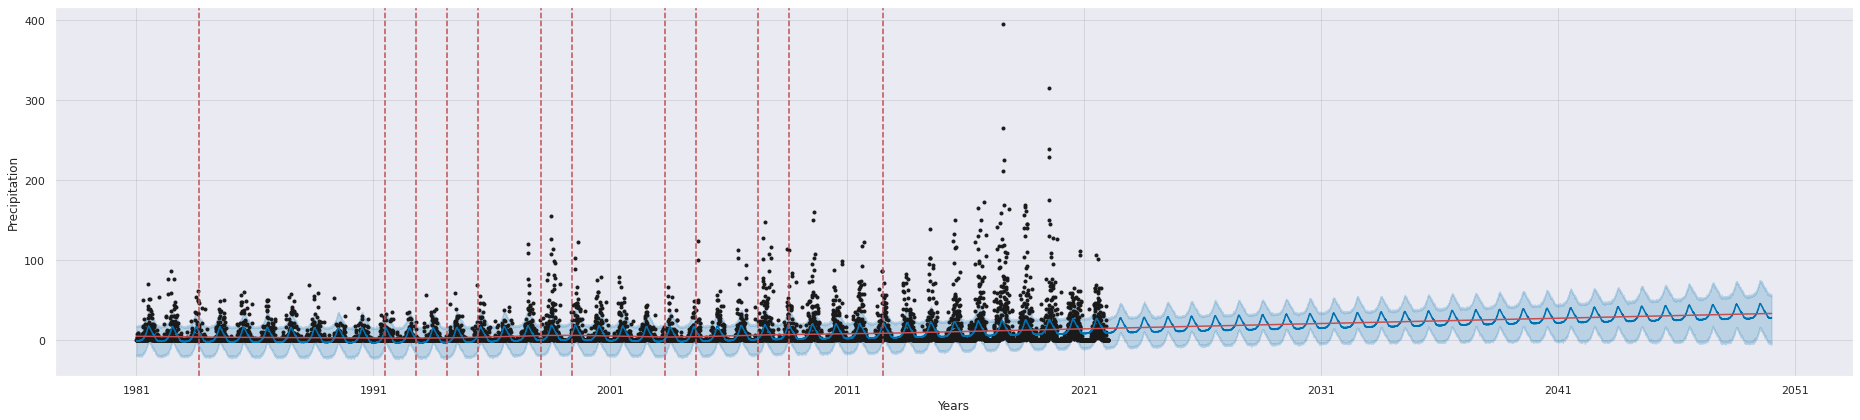

In [37]:
fig = model4.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model4, forecast)
plt.xlabel('Years')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

> 4.6 Visusalization of Trend, Yearly & Day

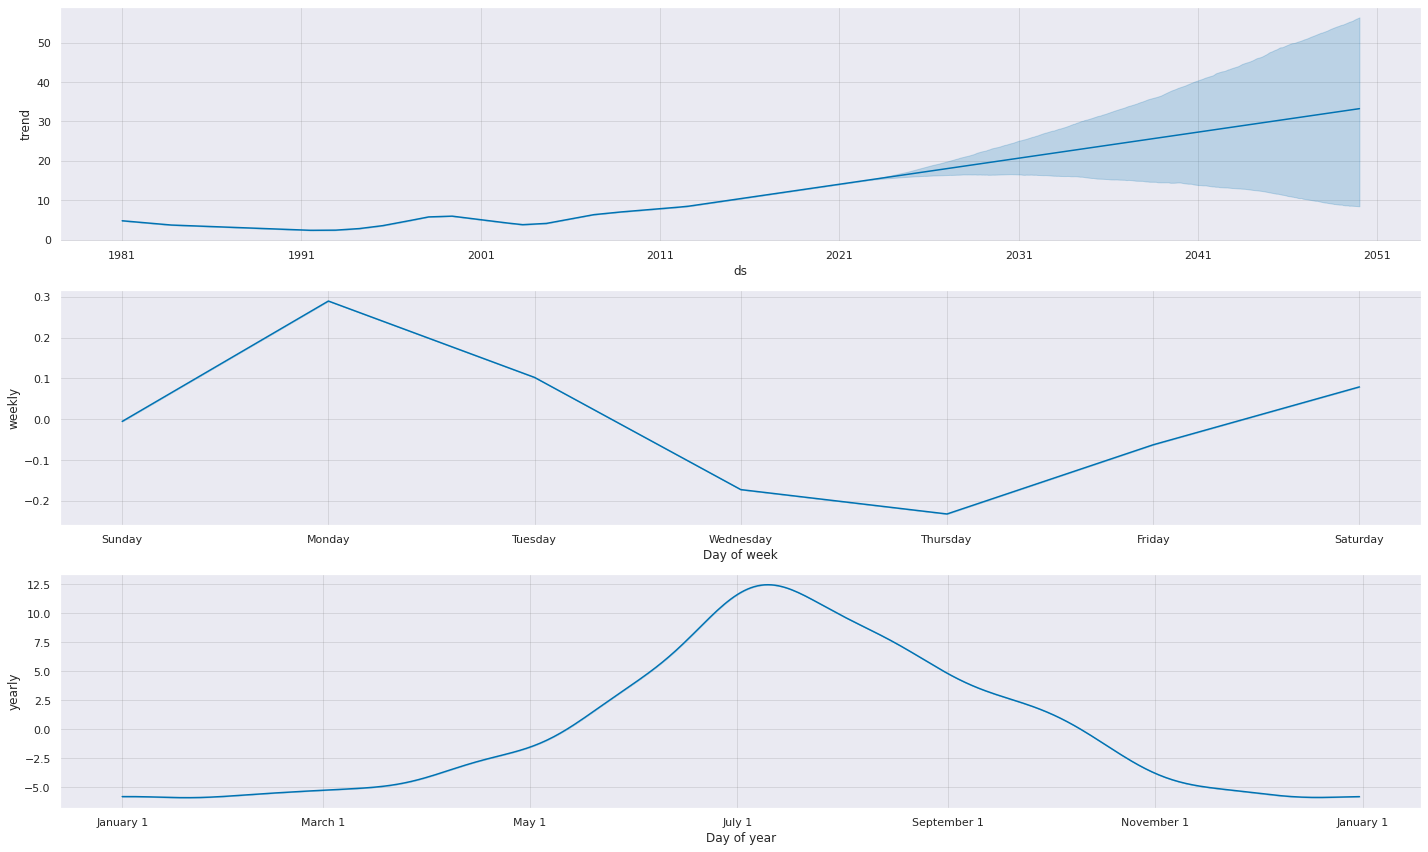

In [38]:
fig = model4.plot_components(forecast, figsize=(20, 12))

#### 5 **Max Wind Speed**

> 5.1 Model Creation

In [39]:
model5 = Prophet()

> 5.2 Data preprocessing

In [40]:
df_for_wind_max = pd.DataFrame()  
df_for_wind_max['ds'] = df['Date']
df_for_wind_max['y'] = df['Wind Speed Max']
df_for_wind_max['ds'] = pd.to_datetime(df_for_wind_max['ds'])
model5.fit(df_for_wind_max)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/nyogvqko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/b5g5dsn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2772', 'data', 'file=/tmp/tmpu5h4dkxl/nyogvqko.json', 'init=/tmp/tmpu5h4dkxl/b5g5dsn7.json', 'output', 'file=/tmp/tmpucx5su5h/prophet_model-20220905221104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 5.3 Generate future Dates

In [41]:
# 2022 - 2050 : 10226 days
future = model5.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 5.4 predict future Humidity

In [42]:
forecast = model5.predict(future)
predicted_data['Max Wind Speed'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
25197 2049-12-27  2.923357    0.120150    5.354409
25198 2049-12-28  2.971520    0.105658    5.512386
25199 2049-12-29  3.017317    0.307249    5.442282
25200 2049-12-30  2.950869    0.183741    5.377412
25201 2049-12-31  2.976558    0.283067    5.443110

> 5.5 Visusalization (past and future)

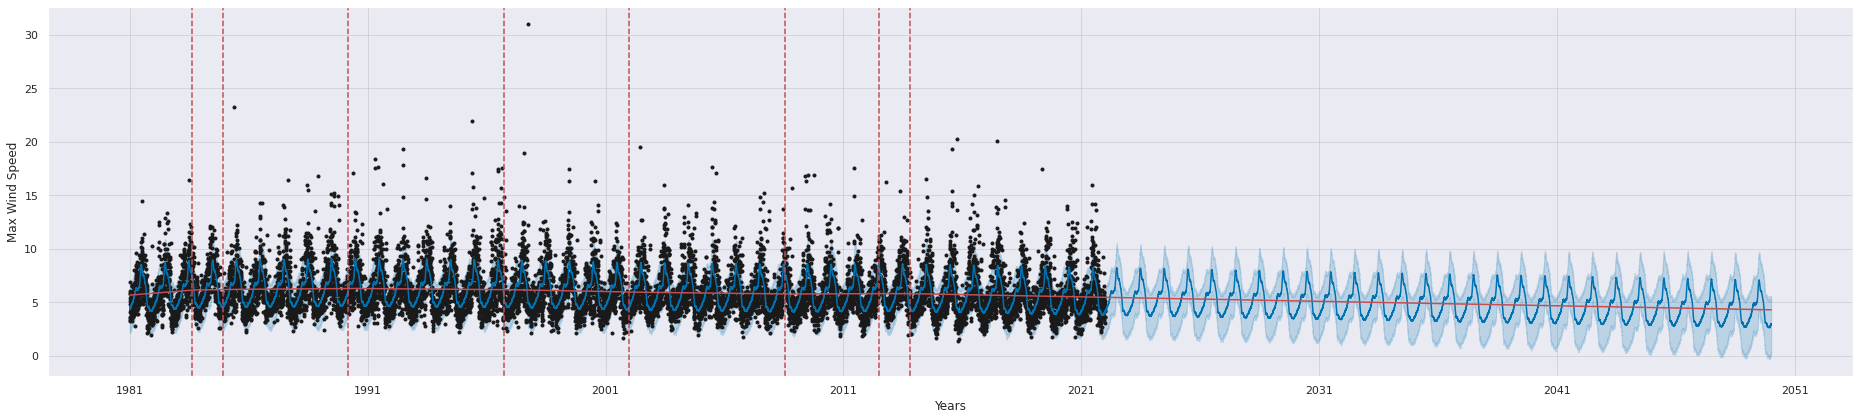

In [43]:
fig = model5.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model5, forecast)
plt.xlabel('Years')
plt.ylabel('Max Wind Speed')
plt.tight_layout()
plt.show()

> 5.6 Visusalization of Trend, Yearly & Day

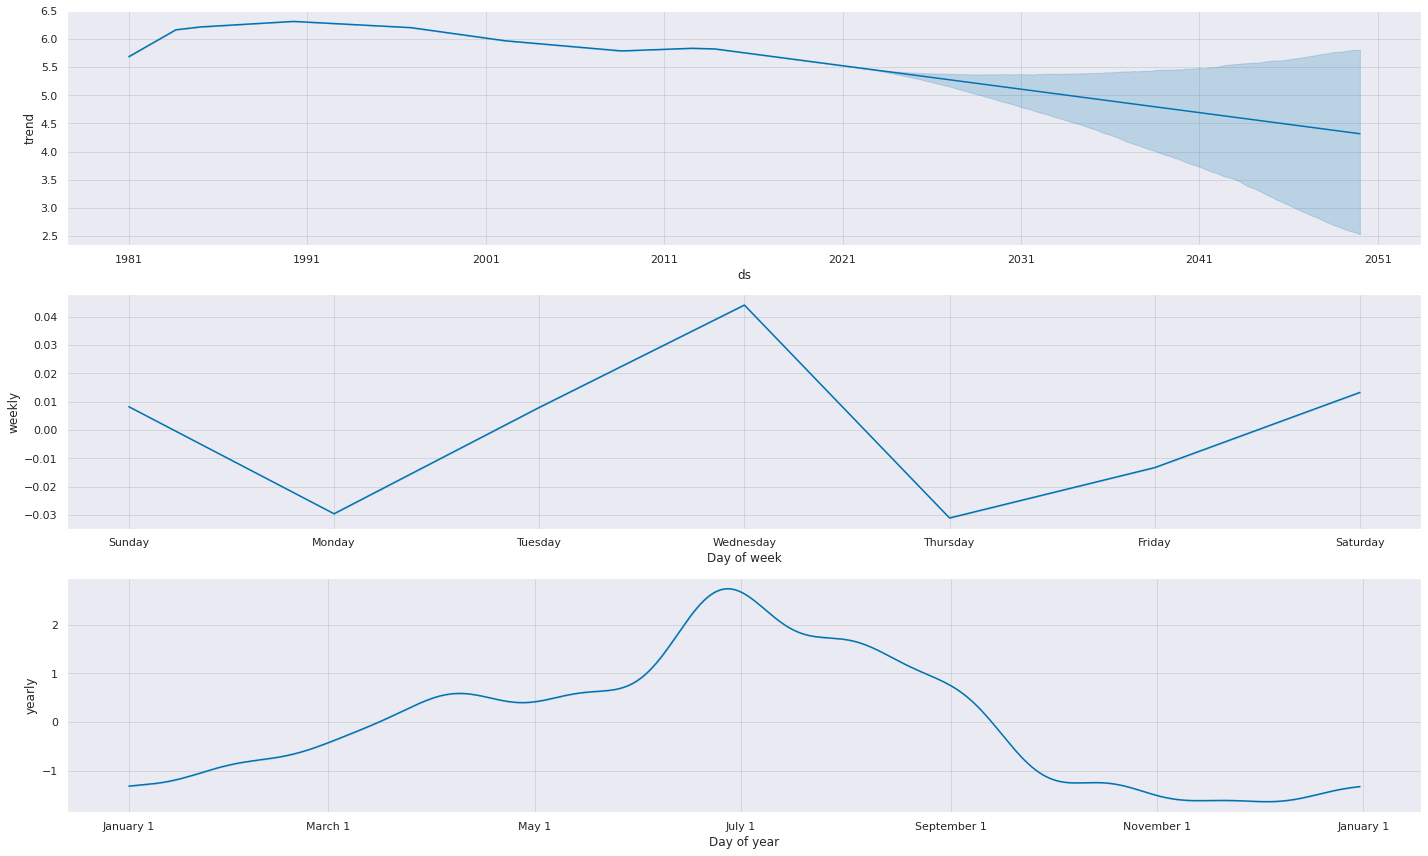

In [44]:
fig = model5.plot_components(forecast, figsize=(20, 12))

#### 6 **Min Wind Speed**

> 6.1 Model Creation

In [45]:
model6 = Prophet()

> 6.2 Data preprocessing

In [46]:
df_for_wind_min = pd.DataFrame()  
df_for_wind_min['ds'] = df['Date']
df_for_wind_min['y'] = df['Wind Speed Min']
df_for_wind_min['ds'] = pd.to_datetime(df_for_wind_min['ds'])
model6.fit(df_for_wind_min)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/qr0lypvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/wvv61wb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7885', 'data', 'file=/tmp/tmpu5h4dkxl/qr0lypvb.json', 'init=/tmp/tmpu5h4dkxl/wvv61wb2.json', 'output', 'file=/tmp/tmpg_g2kr1q/prophet_model-20220905221133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 6.3 Generate future Dates

In [47]:
# 2022 - 2050 : 10226 days
future = model6.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 6.4 predict future Humidity

In [48]:
forecast = model6.predict(future)
predicted_data['Min Wind Speed'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
25197 2049-12-27  0.399893   -1.685212    2.455806
25198 2049-12-28  0.429241   -1.636590    2.534974
25199 2049-12-29  0.459616   -1.535500    2.241670
25200 2049-12-30  0.420073   -1.444339    2.443691
25201 2049-12-31  0.432822   -1.489358    2.387847

> 6.5 Visusalization (past and future)

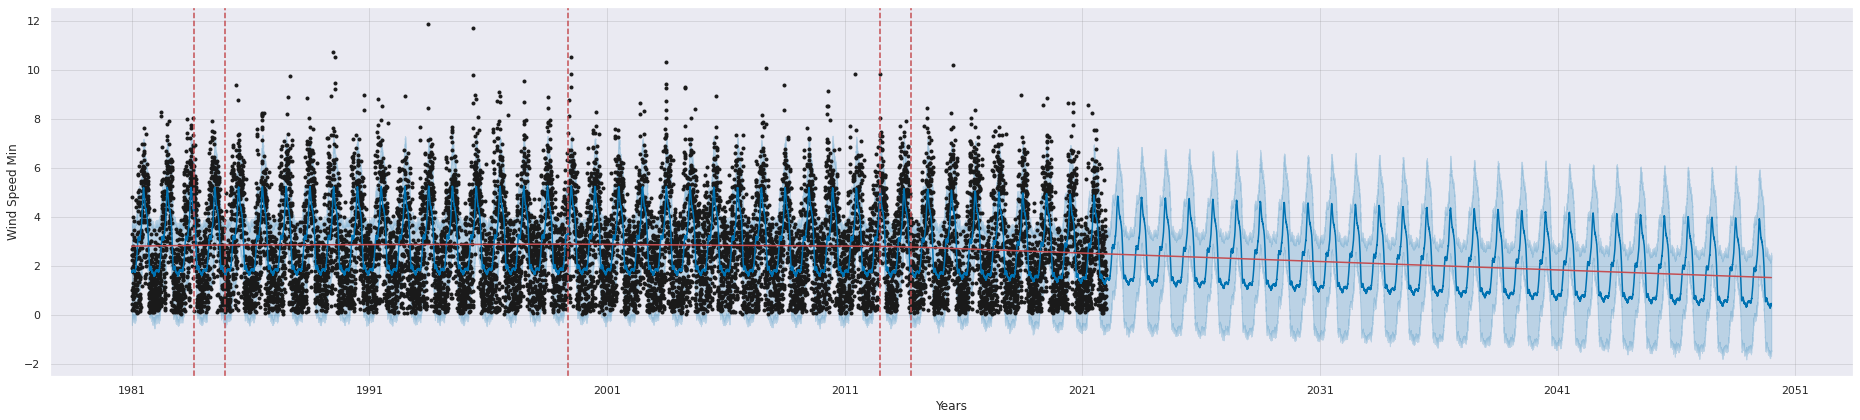

In [49]:
fig = model6.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model6, forecast)
plt.xlabel('Years')
plt.ylabel('Wind Speed Min')
plt.tight_layout()
plt.show()

> 6.6 Visusalization of Trend, Yearly & Day

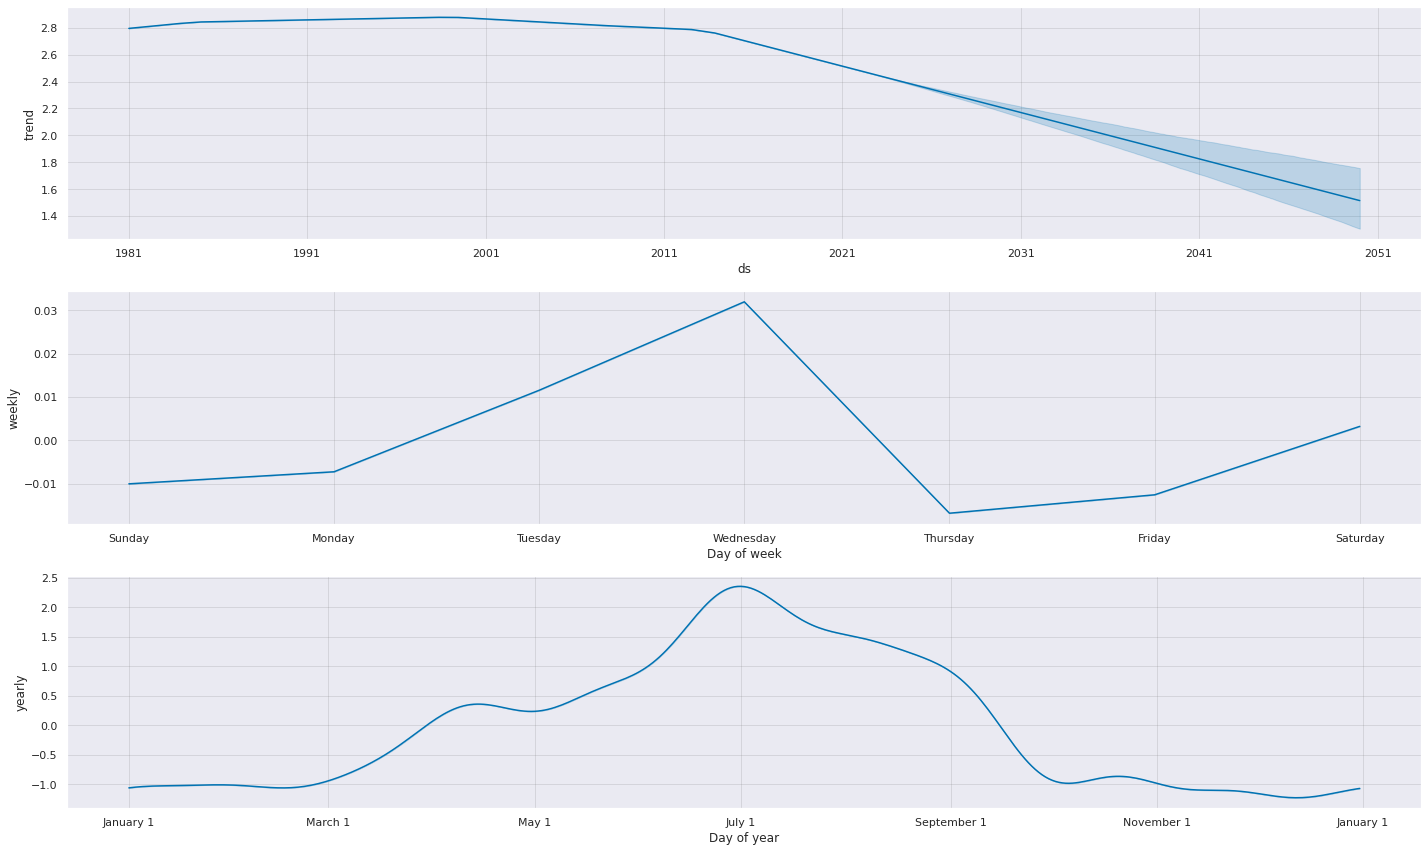

In [50]:
fig = model6.plot_components(forecast, figsize=(20, 12))

#### 7 **Wind Direction**

> 7.1 Model Creation

In [51]:
model7 = Prophet()

> 7.2 Data preprocessing

In [52]:
df_for_wind_dir = pd.DataFrame()  
df_for_wind_dir['ds'] = df['Date']
df_for_wind_dir['y'] = df['Wind Direction']
df_for_wind_dir['ds'] = pd.to_datetime(df_for_wind_dir['ds'])
model7.fit(df_for_wind_dir)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/146nd5j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5h4dkxl/egsja5y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73625', 'data', 'file=/tmp/tmpu5h4dkxl/146nd5j6.json', 'init=/tmp/tmpu5h4dkxl/egsja5y8.json', 'output', 'file=/tmp/tmp3cwb53f7/prophet_model-20220905221157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 7.3 Generate future Dates

In [53]:
# 2022 - 2050 : 10226 days
future = model7.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 7.4 predict future Humidity

In [54]:
forecast = model7.predict(future)
predicted_data['Wind Direction'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
25197 2049-12-27  159.894424  110.009645  210.146092
25198 2049-12-28  160.629806  113.049571  213.502730
25199 2049-12-29  160.351992  110.647379  210.617105
25200 2049-12-30  161.499662  113.414766  213.437569
25201 2049-12-31  162.020839  113.010173  214.152979

> 7.5 Visusalization (past and future)

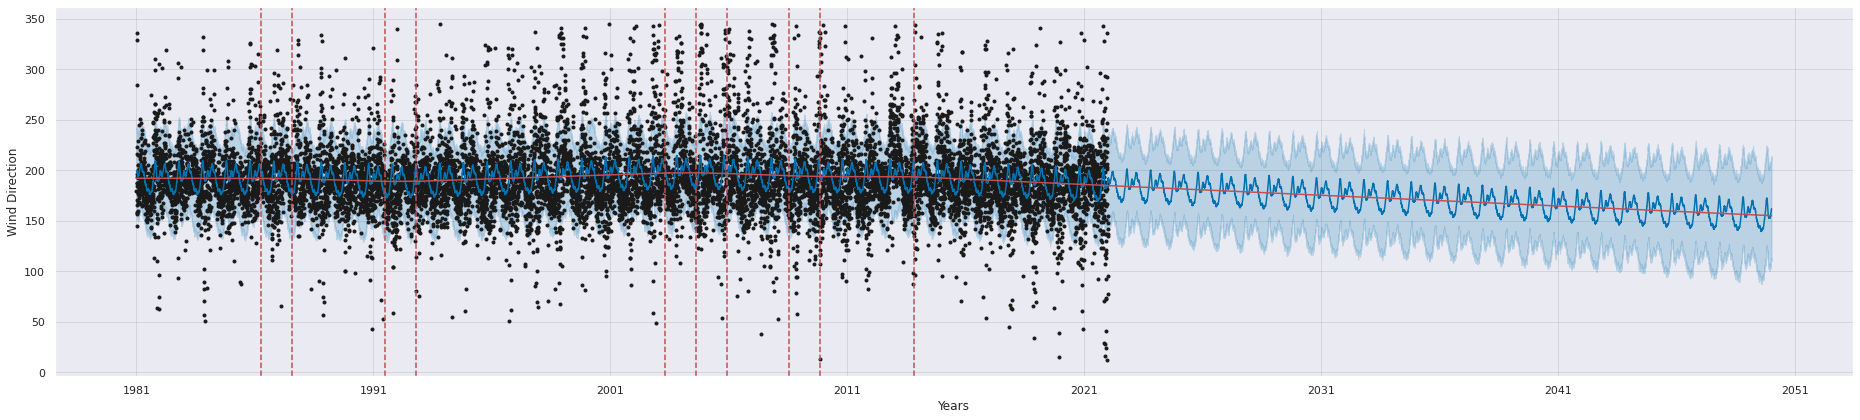

In [55]:
fig = model7.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model7, forecast)
plt.xlabel('Years')
plt.ylabel('Wind Direction')
plt.tight_layout()
plt.show()

> 7.6 Visusalization using barchart

In [56]:
fig = go.Figure()
WINdIR = ['East(E)', 'ENE', 'NE', 'NNE', 'North(N)', 'NNW', 'NW', 'WNW', 'West(W)', 'WSW', 'SW', 'SSW', 'South(S)', 'SSE', 'SE', 'ESE']
             
fig.add_trace(go.Barpolar(r = df.groupby('Wind Speed Range')['Wind Direction'].mean(),
                          theta=WINdIR,
                          name='Wind Direction',
                        #   fill='tonext',
                          )
             )
fig.update_layout(polar=dict(radialaxis=dict(visible=False)),
                  showlegend=True,
                  title='Wind Direction',
                  titlefont={'size': 22, 'family':'Serif'},
                #   template='plotly_dark',
                #   paper_bgcolor='lightgray',
                  width=800, height=500,
                 )
fig.show()

## Predicted Data Samples

In [57]:
predicted_data.iloc[-10227:,:]

Date   Humidity   Max Temp   Min Temp  Precipitation  \
14975 2022-01-01   9.964455  24.109702  14.057871       8.981082   
14976 2022-01-02   9.918006  24.104157  13.999358       8.900280   
14977 2022-01-03   9.866832  24.045566  13.945130       9.197335   
14978 2022-01-04   9.809638  24.008393  13.887746       9.011111   
14979 2022-01-05   9.762963  23.994540  13.837242       8.735836   
...          ...        ...        ...        ...            ...   
25197 2049-12-27  11.771848  23.772298  14.892160      27.695674   
25198 2049-12-28  11.707827  23.711830  14.814689      27.517596   
25199 2049-12-29  11.653720  23.672680  14.741969      27.251245   
25200 2049-12-30  11.576902  23.673126  14.643018      27.199003   
25201 2049-12-31  11.520604  23.656620  14.572607      27.374831   

       Max Wind Speed  Min Wind Speed  Wind Direction  
14975        4.178093        1.422884      191.973784  
14976        4.179718        1.416443      191.933264  
14977        4.148237        1.425187      191.823179  
14978        4.191901        1.449128      192.214689  
14979        4.234216        1.473867      191.566216  
...               ...             ...             ...  
25197        2.923357        0.399893      159.894424  
25198        2.971520        0.429241      160.629806  
25199        3.017317        0.459616      160.351992  
25200        2.950869        0.420073      161.499662  
25201        2.976558        0.432822      162.020839  

[10227 rows x 8 columns]